In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
# Load dataset
df = pd.read_csv("yt analysis.csv")

# Preview
df.head()
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  364 non-null    int64  
 1   Video Duration                      364 non-null    float64
 2   Video Publish Time                  364 non-null    object 
 3   Days Since Publish                  364 non-null    int64  
 4   Day                                 364 non-null    int64  
 5   Month                               364 non-null    int64  
 6   Year                                364 non-null    int64  
 7   Day of Week                         364 non-null    object 
 8   Revenue per 1000 Views (USD)        364 non-null    float64
 9   Monetized Playbacks (Estimate)      364 non-null    float64
 10  Playback-Based CPM (USD)            364 non-null    float64
 11  CPM (USD)                           364 non-n

ID                         0
Video Duration             0
Video Publish Time         0
Days Since Publish         0
Day                        0
                          ..
Watch Time (hours)         0
Subscribers                0
Estimated Revenue (USD)    0
Impressions                0
Video Thumbnail CTR (%)    0
Length: 70, dtype: int64

In [7]:
import isodate

# Drop missing values (simplest way)
df = df.dropna()

# Convert publish time to datetime
df['Video Publish Time'] = pd.to_datetime(df['Video Publish Time'])

# Convert 'Video Duration' into seconds (if it's in ISO format like PT12M30S)
if df['Video Duration'].dtype == 'object':
    df['Video Duration'] = df['Video Duration'].apply(
        lambda x: isodate.parse_duration(x).total_seconds() if isinstance(x, str) else x
    )

# Quick check
print(df[['Video Duration', 'Video Publish Time']].head())


   Video Duration Video Publish Time
0           201.0         2016-06-02
1           391.0         2016-06-10
2           133.0         2016-06-14
3            14.0         2016-06-29
4            45.0         2016-07-01


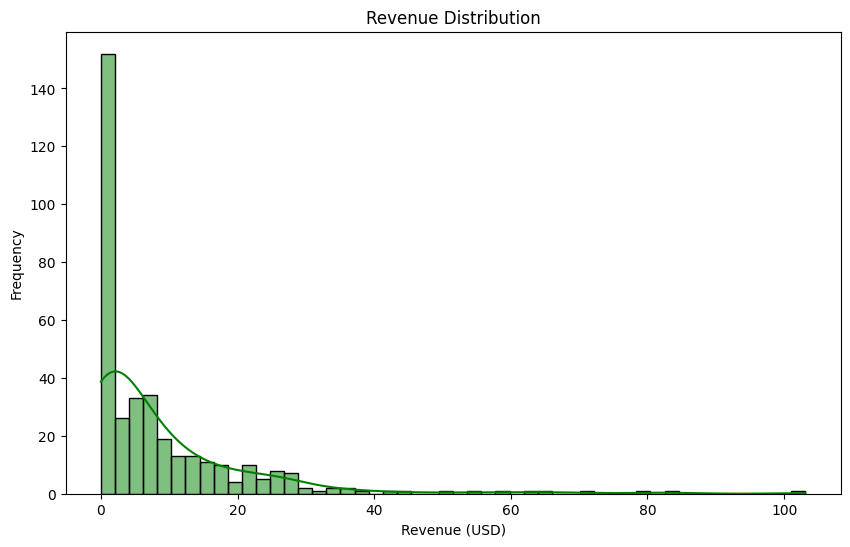

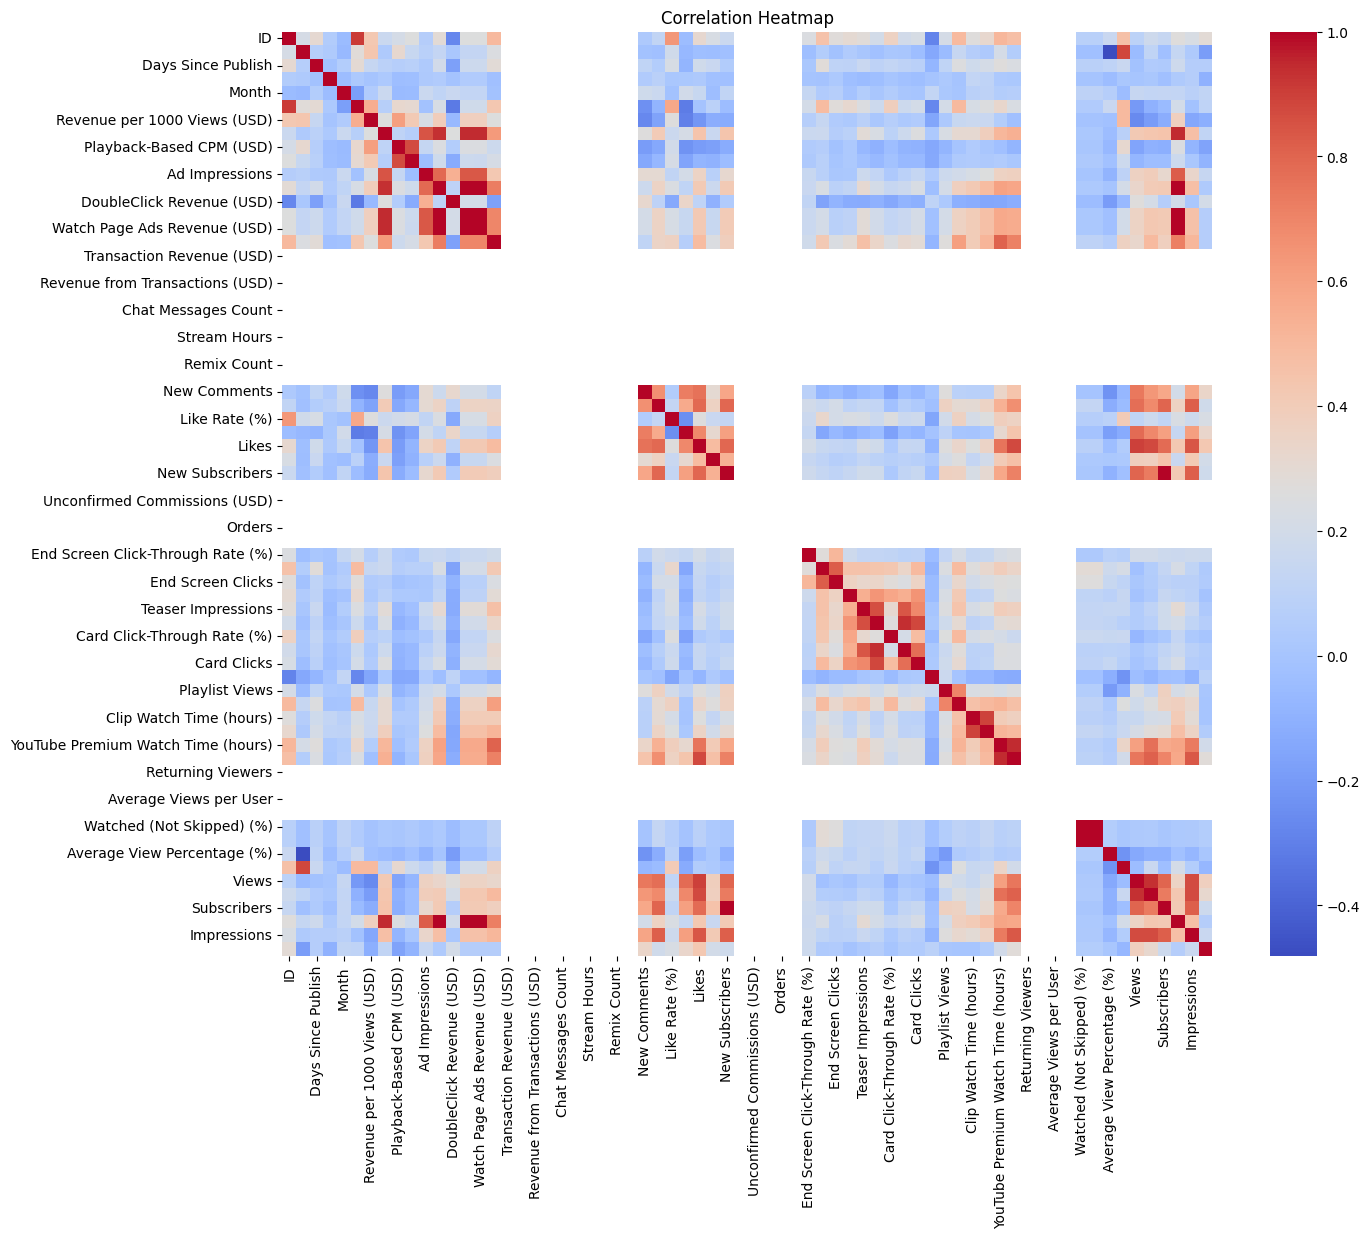

      ID  Estimated Revenue (USD)     Views  Subscribers
228  228                  103.117  670990.0       3538.0
257  257                   83.979  241060.0       1125.0
251  251                   80.265  343319.0       1437.0
289  289                   70.247   99196.0        350.0
278  278                   65.978  188324.0       1824.0
260  260                   62.047  302999.0        866.0
293  293                   59.058  101025.0        602.0
294  294                   55.040   67556.0        581.0
290  290                   50.344   89284.0        995.0
284  284                   44.228   93487.0        305.0


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Revenue Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Estimated Revenue (USD)'], bins=50, kde=True, color='green')
plt.title("Revenue Distribution")
plt.xlabel("Revenue (USD)")
plt.ylabel("Frequency")
plt.show()

# Correlation Heatmap (only numeric columns)
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(15,12))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# Top 10 videos by revenue
top_videos = df.sort_values(by='Estimated Revenue (USD)', ascending=False).head(10)
print(top_videos[['ID','Estimated Revenue (USD)','Views','Subscribers']])


In [12]:
print(df.columns.tolist())


['ID', 'Video Duration', 'Video Publish Time', 'Days Since Publish', 'Day', 'Month', 'Year', 'Day of Week', 'Revenue per 1000 Views (USD)', 'Monetized Playbacks (Estimate)', 'Playback-Based CPM (USD)', 'CPM (USD)', 'Ad Impressions', 'Estimated AdSense Revenue (USD)', 'DoubleClick Revenue (USD)', 'YouTube Ads Revenue (USD)', 'Watch Page Ads Revenue (USD)', 'YouTube\xa0Premium (USD)', 'Transaction Revenue (USD)', 'Transactions', 'Revenue from Transactions (USD)', 'Reactions', 'Chat Messages Count', 'Reminders Set', 'Stream Hours', 'Remix Views', 'Remix Count', 'Subscribers from Posts', 'New Comments', 'Shares', 'Like Rate (%)', 'Dislikes', 'Likes', 'Unsubscribes', 'New Subscribers', 'Returned Items (USD)', 'Unconfirmed Commissions (USD)', 'Approved Commissions (USD)', 'Orders', 'Total Sales Volume (USD)', 'End Screen Click-Through Rate (%)', 'End Screen Impressions', 'End Screen Clicks', 'Teaser Click-Through Rate (%)', 'Teaser Impressions', 'Teaser Clicks', 'Card Click-Through Rate (%)'

In [13]:
# Create Revenue per View (already there in your dataset, but let's recompute to be safe)
df['Revenue per View'] = df['Estimated Revenue (USD)'] / df['Views']

# Create Engagement Rate = (Likes + Shares + New Comments) / Views * 100
df['Engagement Rate'] = (df['Likes'] + df['Shares'] + df['New Comments']) / df['Views'] * 100

# Quick check
print(df[['Estimated Revenue (USD)', 'Views', 'Revenue per View', 'Engagement Rate']].head())


   Estimated Revenue (USD)    Views  Revenue per View  Engagement Rate
0                    0.561  23531.0          0.000024         4.364455
1                    0.648  11478.0          0.000056         3.153860
2                    0.089   6153.0          0.000014         3.949293
3                    0.017   4398.0          0.000004         5.434288
4                    0.000  14659.0          0.000000         4.495532


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
features = ['Views', 'Subscribers', 'Likes', 'Shares', 'New Comments', 'Engagement Rate']
target = 'Estimated Revenue (USD)'

X = df[features]
y = df[target]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Mean Squared Error: 75.70
R-squared Score: 0.13


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15424\3850147445.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")


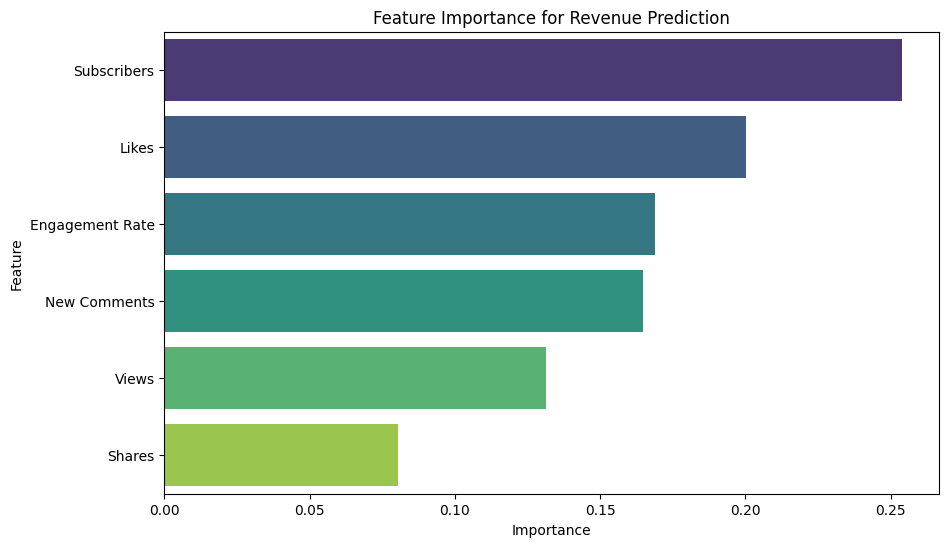

           Feature  Importance
1      Subscribers    0.254034
2            Likes    0.200227
5  Engagement Rate    0.169063
4     New Comments    0.164827
0            Views    0.131276
3           Shares    0.080573


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get feature importance values
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")
plt.title("Feature Importance for Revenue Prediction")
plt.show()

# Print importance values
print(feature_importance_df)


In [16]:
import joblib

# Save trained model
joblib.dump(model, "youtube_revenue_predictor.pkl")

print("✅ Model saved as youtube_revenue_predictor.pkl")


✅ Model saved as youtube_revenue_predictor.pkl


In [17]:
# Load saved model
loaded_model = joblib.load("youtube_revenue_predictor.pkl")

# Example: predict revenue for first test row
example = X_test.iloc[0].to_frame().T
predicted = loaded_model.predict(example)
print("Predicted Revenue:", predicted[0])


Predicted Revenue: 9.840940000000005


In [18]:
# Compare first 10 predictions vs actual values
comparison = pd.DataFrame({
    "Actual Revenue": y_test[:10].values,
    "Predicted Revenue": y_pred[:10]
})
print(comparison)


   Actual Revenue  Predicted Revenue
0           0.000            9.84094
1           1.063            2.26001
2           0.723            1.69790
3          14.953           10.05815
4           3.567           17.34421
5           0.240            9.78185
6           0.382            0.88528
7          13.133            8.70682
8           7.401           12.31788
9          24.603            7.83140
